<a href="https://colab.research.google.com/github/GOLISHYAMP/Colab_Notebooks/blob/main/SupportVectorClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 1000, n_features = 2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=31)

<Axes: >

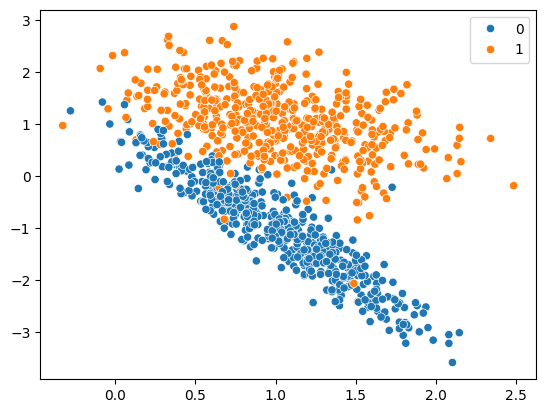

In [18]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue=y)

# **So linear SVC kernel as classify the data.**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 31)

In [20]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.98
[[99  0]
 [ 4 97]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        99
           1       1.00      0.96      0.98       101

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



# **98% accuracy cool right, lets change the dataset and see.**

In [22]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 1000, n_features = 2, n_classes=2, n_clusters_per_class=2, n_redundant=0, random_state=31)

<Axes: >

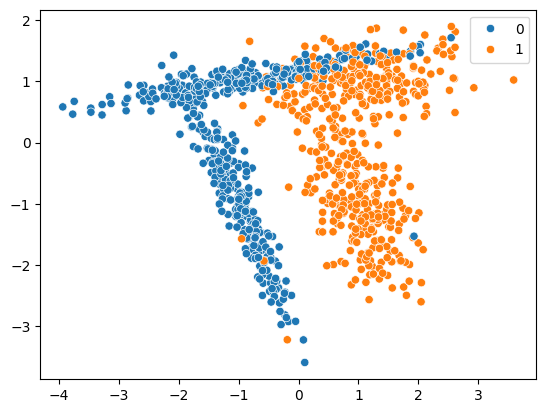

In [23]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue=y)

# **Now the above graph cannot be classify by using the linear svc kernel**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 31)

In [25]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.945
[[ 86   7]
 [  4 103]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        93
           1       0.94      0.96      0.95       107

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [26]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.96
[[ 88   5]
 [  3 104]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        93
           1       0.95      0.97      0.96       107

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [27]:
from sklearn.svm import SVC
svc = SVC(kernel = 'poly')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.95
[[ 86   7]
 [  3 104]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        93
           1       0.94      0.97      0.95       107

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [28]:
from sklearn.svm import SVC
svc = SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.935
[[ 87   6]
 [  7 100]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        93
           1       0.94      0.93      0.94       107

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



hyperparameter tunning using the gridsearchCV

In [29]:
params = {
    'C':[1000, 100, 10, 1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
     'gamma':[1, 0.1, 0.01, 0.001, 0.0001]
}

In [30]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator= SVC(), param_grid=params, scoring = 'accuracy', n_jobs=-1, refit=True, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [32]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [33]:
y_pred = grid.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.94
[[89  4]
 [ 8 99]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        93
           1       0.96      0.93      0.94       107

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



# **Ok some what accuracy is increase.**